In [135]:
import numpy as np
import math

ALLOWED_NAMES = {
    k: v for k, v in math.__dict__.items() if not k.startswith("__")
}

def f(function, x, x1, x2, d1, d2):
  return eval(function, {"__builtins__": {}, "x": x, "x1": x1, "x2": x2, "d1": d1, "d2": d2}, ALLOWED_NAMES)

def deriv_f(function, x, h, x1, x2, d1, d2):
  return (f(function, x + h, x1, x2, d1, d2) - f(function, x - h, x1, x2, d1, d2))/(2*h)

def deriv2_f(function, x, h, x1, x2, d1, d2):
  return (f(function, x-h, x1, x2, d1, d2) + f(function, x+h, x1, x2, d1, d2) - 2*f(function, x, x1, x2, d1, d2))/(h**2)

def newtonSearch(function, x, x1, x2, d1, d2):
  lmbda = x
  lmbda_next = 0
  e = 10**-6
  h = 10**-6
  timeout = 500
  time = 0

  while time < timeout:
    firstDeriv = deriv_f(function, lmbda, h, x1, x2, d1, d2)
    secondDeriv = deriv2_f(function, lmbda, h, x1, x2, d1, d2)
    lmbda_next = lmbda - (firstDeriv / secondDeriv)

    if abs(lmbda_next - lmbda) < e:
      return [time, lmbda_next, f(function, lmbda_next, x1, x2, d1, d2)]
    else:
      lmbda = lmbda_next

    time += 1

  raise TimeoutError(f"Algum erro aconteceu, programa demorou muito para responder.")

In [136]:
import matplotlib.pyplot as plt

def plot3D(function, min):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'f(x) = {function}', fontsize=10)
    x1 = np.arange(-20, 20, 0.15)
    x2 = np.arange(-20, 20, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function)

    ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='viridis', label=f'f(x) = {function}')
    ax.contour(x1, x2, z, zdir='z', offset=-100)

    
    ax.scatter(min[0], min[1], color='red', label=f'Mínimo')



Iteração 0 start=[0 3] end=[-2.07337056e-17  0.00000000e+00] ||end-start|| = 3.0 d = [-2.07337056e-17 -3.00000000e+00] λ^=0.0 i1=2 i2=0
[-1.76002062e-23  0.00000000e+00]


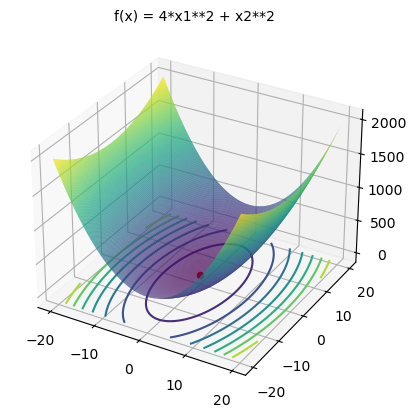

In [137]:
def hookeJeeves(function, initialValue, dim):
    x1, x2 = initialValue[0], initialValue[1]
    nextValue = np.array(["(x1 + x*d1)", "(x2 + x*d2)"])
    nextFunc = function.replace("x1", nextValue[0]).replace("x2", nextValue[1])

    d = np.array(
        [[1,0], 
        [0,1]]
    )

    limit = 0.0001
    k = 0
    timeout = 100
    time = 0
    
    while time < timeout:
        i1, i2 = 0, 0
        start = np.array([x1, x2])
        end = np.array([0, 0])

        for k in range(dim):          
            d1, d2 = d[k][0], d[k][1]

            [i1, x, y] = newtonSearch(nextFunc, max([x1, x2]), x1, x2, d1, d2)

            x1, x2 = eval(nextValue[0]), eval(nextValue[1])

            if k == dim-1:
                end = np.array([x1, x2])

        resultd = end - start
        startEndMod = np.sqrt(np.sum((resultd) ** 2))

        if startEndMod < limit:
            return end
        
        d1, d2 = resultd[0], resultd[1]

        [i2, x, y] = newtonSearch(nextFunc, max([x1, x2]), x1, x2, d1, d2)

        x1, x2 = eval(nextValue[0]), eval(nextValue[1])

        print(f"Iteração {time} start={start} end={end} ||end-start|| = {startEndMod} d = {resultd} λ^={x} i1={i1} i2={i2}")

        time += 1
    
function = "4*x1**2 + x2**2"
initialValue = np.array([0,3])

min = hookeJeeves(function, initialValue, 2)

print(min)

plot3D(function, min)

In [138]:
# functionx = "(x1+x - 2)**4 + (x1+x - 2*x2)**4"
# functiony = "(x1 - 2)**4 + (x1 - 2*(x2+x))**4"